In [1]:
# imporing necessary packages
import pandas as pd
import numpy as np
import sympy.mpmath as math
import matplotlib.pyplot as plt
%matplotlib inline

In [210]:
# Paramertization of the model

rmax = 0.18
kn = 1.4*10**(-2)
qp = 0.05
qz1 = 0.002
b = 0.7
gmax1 = 0.05
gmax2 = 1.0
Iv = 1.4*10**(-2)
dep = 20
sp = 3.0*10**(-12)
sz = 1.5*10**(-11)
umax = 1.4*10**(-11)
ks = 0.5
kp1 = 1.5*10**8
kp2 = 8.5*10**9
ss = 0.05


In [216]:
# defining the parameterization equations
def h(t):
    return (7-4*math.cos((2*math.pi/365)*(t+10)))
def dl(t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))
def r(t):
    return (924.7-400*math.cos((2*math.pi/365)*(t-18964)))
def sr(r, h, dl):
    return r*(h/dl)+(r*0.5*(1-h/dl))

def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.25*math.cos((2*math.pi/365)*(t+10))
def M(st, sw):
    return (((1.9/st)**1.95)*(sw/2)**0.51)*2000

def srd(sr, M):
    return sr*math.e**(-0.1*M/2)
def sun(srd):
    return srd/(100+srd)

def cz1(p):
    return p**2/(kp1**2+p**2)
def cz2(p):
    return p**2/(kp2**2+p**2)
def cp(n):
    return n/(kn+n)

def nr(M):
    return (0.42/10)*((M-20)/M)/8
def chk1(M):
    if M <= 20:
        return 0
    else:
        return 1
def chk2(n):
    if n >= 0.42:
        return 0
    else:
        return 1
#def gmax(st):
    #return 0.12*math.e**(0.069*st)
def qz2(st):
    return (2**st)/100000


    

# defining the differential n, p, z equations
def n_prime(cp, sun, nr, chk1, chk2):
  return  -p*sun*umax*cp + nr*chk1*chk2
def p_prime(n, p, z1, z2, cz1, cz2, cp, sun):
  return (p*rmax*cp*sun)-(qp*p)-(gmax1*cz1*z1)-(gmax2*cz2*z2)
def z1_prime(p, z1, cz, qz1):
  return (1-b)*gmax1*cz*z1-qz1*z1
def z2_prime(p, z2, cz, qz2):
  return (1-b)*gmax2*cz*z-qz2*z2

#initial values
t = 0
t_i = 0.1
p = 1.0*10**7
z1 = 10
z2 = 10
n = 0.42

# Creating an array for the output values differential equation
t_array = []
p_array = []
z1_array = []
z2_array = []
n_array = []

while t <= 600:
  t = t + t_i
  new_n = n_prime(cp(n), sun(srd(sr(r(t), h(t), dl(t)), M(st(t), sw(t)))), nr(M(st(t), sw(t))), chk1(M(st(t), sw(t))), chk2(n))*t_i + n
  new_p = p_prime(n, p, z1, z2, cz1(p), cz2(p), cp(n), sun(srd(sr(r(t), h(t), dl(t)), M(st(t), sw(t)))))*t_i + p
  new_z1 = z1_prime(p, z1, cz1(p), qz1)*t_i + z1
  new_z2 = z2_prime(p, z2, cz2(p), qz2(st(t)))*t_i + z2
  p, z1, z2, n = new_p, new_z1,  new_z2, new_n
  t_array.append(t)
  p_array.append(p)
  z1_array.append(z1)
  z2_array.append(z2)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton_1': z1_array, 'zooplankton_2': z2_array, 'nitrogen': n_array}
print(output)



{'zooplankton_1': [9.998066371681416, mpf('9.9961326873697054'), mpf('9.9941989502437476'), mpf('9.992265163466552'), mpf('9.9903313301722427'), mpf('9.9883974534728157'), mpf('9.9864635364582757'), mpf('9.984529582196771'), mpf('9.9825955937347324'), mpf('9.9806615740970059'), mpf('9.9787275262869901'), mpf('9.976793453286767'), mpf('9.9748593580572393'), mpf('9.9729252435382598'), mpf('9.9709911126487665'), mpf('9.9690569682869121'), mpf('9.9671228133301994'), mpf('9.9651886506356053'), mpf('9.9632544830397141'), mpf('9.9613203133588488'), mpf('9.9593861443891978'), mpf('9.957451978906942'), mpf('9.9555178196683833'), mpf('9.9535836694100706'), mpf('9.9516495308489272'), mpf('9.9497154066823761'), mpf('9.9477812995884651'), mpf('9.9458472122259902'), mpf('9.9439131472346212'), mpf('9.9419791072350225'), mpf('9.940045094828978'), mpf('9.9381111125995112'), mpf('9.9361771631110063'), mpf('9.9342432489093326'), mpf('9.93230937252196'), mpf('9.9303755364580812'), mpf('9.9284417432087277'

In [217]:
output_df = pd.DataFrame(output)
output_df.to_csv('output.csv')

In [218]:
npz_model = pd.read_csv('output.csv', sep=',')
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton_1,zooplankton_2
0,0,0.419999,9967412.950013,0.1,9.998066,9.997658
1,1,0.420373,9934949.587106,0.2,9.996133,9.995313
2,2,0.420371,9902610.054567,0.3,9.994199,9.992966
3,3,0.420370,9870393.494369,0.4,9.992265,9.990617
4,4,0.420369,9838299.551247,0.5,9.990331,9.988266


In [219]:
npz_model['zooplankton'] = npz_model['zooplankton_1']+npz_model['zooplankton_2']
npz_model.head()

,Unnamed: 0,nitrogen,phytoplankton,time,zooplankton_1,zooplankton_2,zooplankton
0,0,0.419999,9967412.950013,0.1,9.998066,9.997658,19.995724
1,1,0.420373,9934949.587106,0.2,9.996133,9.995313,19.991446
2,2,0.420371,9902610.054567,0.3,9.994199,9.992966,19.987165
3,3,0.420370,9870393.494369,0.4,9.992265,9.990617,19.982883
4,4,0.420369,9838299.551247,0.5,9.990331,9.988266,19.978598


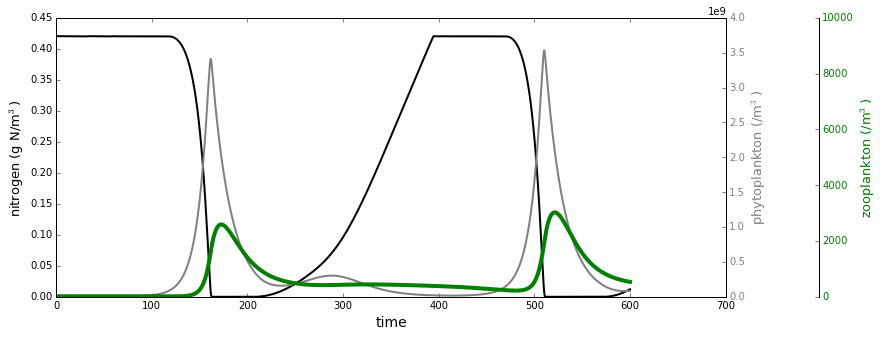

In [220]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
ax3.set_ylim(0, 10000)
#ax2.set_ylim(0, 1*10**5)

plt.show()

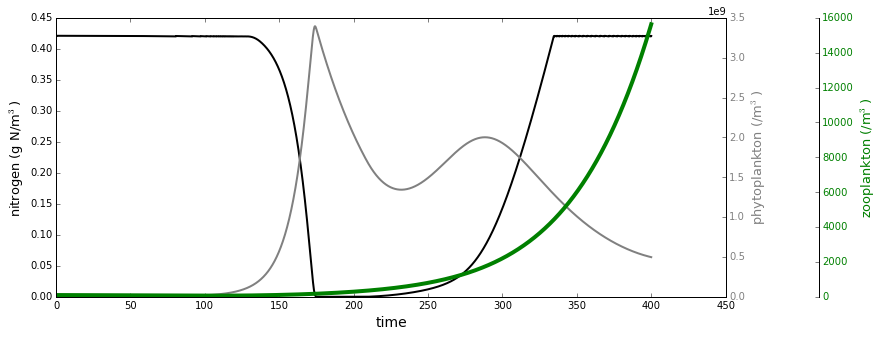

In [542]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
#ax3.set_ylim(0, 2.5)
#ax2.set_ylim(0, 2.5)

plt.show()

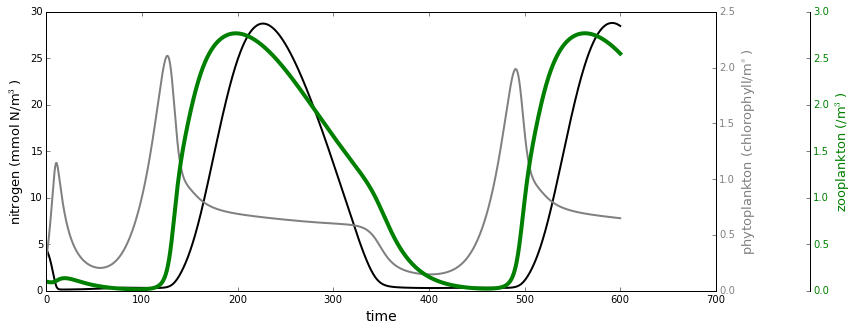

In [141]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (mmol N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (chlorophyll/m$^s$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax3.set_ylim(0,0.9)
#ax2.set_ylim(0, 0.9)

plt.show()

In [106]:
# Paramertization of the model

rmax = 2
kn = 1
qp = 0.1
qz = 0.2
b = 0.7
gmax = 1.5
Iv = 1
dep = 20

In [182]:
def cz(p):
    return gmax*Iv*p*(1-math.e**(-Iv*p))
def cp(n):
    return n/(kn+n)

# defining the differential n, p, z equations
def n_prime(n, p, z):
  return (qp*p) + (qz*z) + b*gmax*Iv*p*(1-math.e**(-Iv*p))*z - n/(kn+n)*p*rmax
def p_prime(n, p, z):
  return (rmax*p*n/(kn+n))-(qp*p)-(gmax*Iv*p*(1-math.e**(-Iv*p))*z)
def z_prime(p, z):
  return (1-b)*gmax*Iv*p*(1-math.e**(-Iv*p))*z-qz*z 

#initial values
t = 0
t_i = 0.1
p = 0.3
z = 0.1
n = 1.6

t_array = []
p_array = []
z_array = []
n_array = []

while t <= 50:
  t = t + t_i
  #new_r = r(p, t)
  #new_cz = cz(p)
  #new_cp = cp(n)
  new_n = n_prime(n, p, z)*t_i + n
  new_p = p_prime(n, p, z)*t_i + p
  new_z = z_prime(p, z)*t_i + z
  p, z, n = new_p, new_z, new_n
  #r, cz, cp = new_r, new_cz, new_cp
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)




{'nitrogen': [mpf('1.5833514018205079'), mpf('1.5658725609267139'), mpf('1.5475350389992166'), mpf('1.5283110681419345'), mpf('1.5081738286995487'), mpf('1.4870977630101572'), mpf('1.4650589278709869'), mpf('1.4420353884205079'), mpf('1.4180076559707957'), mpf('1.3929591720313146'), mpf('1.3668768403152538'), mpf('1.3397516078711744'), mpf('1.3115790955877153'), mpf('1.2823602771213827'), mpf('1.2521022037334395'), mpf('1.2208187705214792'), mpf('1.1885315170199851'), mpf('1.1552704520474766'), mpf('1.1210748889277011'), mpf('1.0859942727575129'), mpf('1.050088976214959'), mpf('1.0134310345299922'), mpf('0.97610478378833143'), mpf('0.93820735992982152'), mpf('0.89984900901134945'), mpf('0.86115315309960505'), mpf('0.82225615134104468'), mpf('0.78330669338098646'), mpf('0.74446476367462933'), mpf('0.70590012184199502'), mpf('0.66779025760881106'), mpf('0.63031780040001106'), mpf('0.5936673941259033'), mpf('0.55802208695075306'), mpf('0.52355933221955242'), mpf('0.49044674673670097'), mp

In [220]:

rmax = 1
kn = 1
qp = 0.2
qz = 0.1
b = 0.7
gmax = 1
Iv = 0.84
dep = 20

In [225]:
# defining the parameterization equations
def r(p, t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))/24*(10**(-0.1*0.007*p*dep))
def cz(p):
    return gmax*(1-(math.e)**(-Iv*p))
def cp(n):
    return n/(kn+n)
def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45-0.15*math.cos((2*math.pi/365)*(t+10))
def M(sw, st):
    return (2.5**(sw*st))/1000


# defining the differential n, p, z equations
def n_prime(n, p, z, cz, cp, r, M):
  return (qp*p) + (qz*z) + b*cz*z - p*rmax*cp + M
def p_prime(n, p, z, r, cz, cp):
  return (p*rmax*cp*r)-(qp*p)-(cz*z)
def z_prime(p, z, cz):
  return (1-b)*cz*z-qz*z 

#initial values
t = 0
t_i = 0.1
p = 0.1
z = 0.3
n = 4.5

# Creating an array for the output values differential equation
t_array = []
p_array = []
z_array = []
n_array = []

while t <= 600:
  t = t + t_i
  new_n = n_prime(n, p, z, cz(p), cp(n), r(p, t), M(sw(t), st(t)))*t_i + n
  new_p = p_prime(n, p, z, r(p, t), cz(p), cp(n))*t_i + p
  new_z = z_prime(p, z, cz(p))*t_i + z
  p, z, n = new_p, new_z, new_n
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)




{'nitrogen': [mpf('4.499434572683505'), mpf('4.4989109157072997'), mpf('4.4984274150651506'), mpf('4.4979825095463166'), mpf('4.4975746889441419'), mpf('4.4972024923257878'), mpf('4.4968645063611703'), mpf('4.496559363709201'), mpf('4.4962857414594657'), mpf('4.4960423596275234'), mpf('4.4958279797020442'), mpf('4.4956414032420557'), mpf('4.4954814705226092'), mpf('4.4953470592272158'), mpf('4.4952370831854616'), mpf('4.4951504911542477'), mpf('4.4950862656411452'), mpf('4.4950434217684068'), mpf('4.4950210061762164'), mpf('4.4950180959638093'), mpf('4.4950337976671237'), mpf('4.4950672462717112'), mpf('4.495117604259649'), mpf('4.4951840606892635'), mpf('4.4952658303064936'), mpf('4.4953621526867762'), mpf('4.4954722914063669'), mpf('4.4955955332420485'), mpf('4.495731187398218'), mpf('4.4958785847603737'), mpf('4.4960370771740648'), mpf('4.49620603674839'), mpf('4.4963848551831749'), mpf('4.4965729431189772'), mpf('4.496769729509114'), mpf('4.4969746610129153'), mpf('4.49718720140945

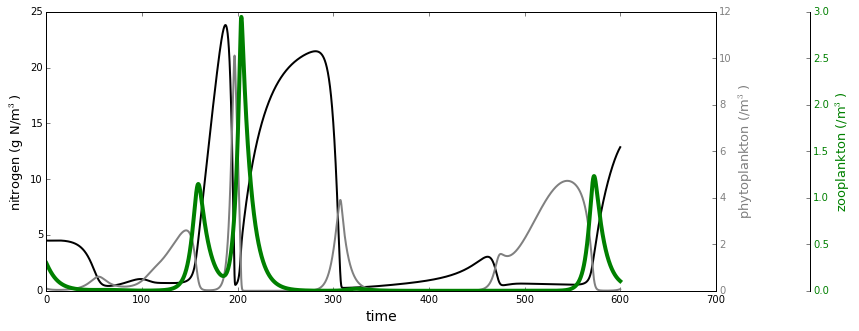

In [228]:
fig = plt.figure(figsize=(12, 5))

# layering the three axes, which contain the three varaibles, on top of one another to create a single subplot
# layering completed with twinx() method
ax1 = plt.subplot()
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# plotting the 3 variables into the predetermined plot outlined above
# Setting the color and width of lines on the graph
ax1.plot(npz_model.time, npz_model.nitrogen, 'k-', linewidth =2)
ax2.plot(npz_model.time, npz_model.phytoplankton, 'grey', linewidth=2)
ax3.plot(npz_model.time, npz_model.zooplankton, 'g-', linewidth=4)
    
# moving the spine that the zooplankton was plotted onto towards the right so it isnt on top of the second spine(ax2)
npz_model.zooplankton_spine = ax3.spines['right']
npz_model.zooplankton_spine.set_position(('axes', 1.14))

# Adjusting the color of the axes ticks to match line color
ax1.yaxis.set_tick_params(labelcolor='k')
ax2.yaxis.set_tick_params(labelcolor='grey')
ax3.yaxis.set_tick_params(labelcolor='green')
    
# Making axes labels, selecting their color, and selecting their size
ax1.set_xlabel(npz_model.time.name, fontsize=14, y=0)
ax1.set_ylabel(npz_model.nitrogen.name + ' (g N/m$^3$)', fontsize = 13, color ='k')
ax2.set_ylabel(npz_model.phytoplankton.name + ' (/m$^3$)', fontsize = 13, color='grey')
ax3.set_ylabel(npz_model.zooplankton.name + ' (/m$^3$)', fontsize = 13, color='g')

#ax1.set_ylim(0, 2.5)
#ax3.set_ylim(0, 2.5)
#ax2.set_ylim(0, 2.5)

plt.show()

In [151]:
h = (6-3*math.cos((2*math.pi/365)*(t+10)))
dl = (12-4*math.cos((2*math.pi/365)*(t+10)))
r = (924.7-400*math.cos((2*math.pi/365)*(t-18964)))
sr = r*(h/dl)

In [152]:

t=200
sr

mpf('702.07775156788455')

In [214]:
st = 10-2*math.cos((2*math.pi/365)*(t+10))
sw = 0.45+0.15*math.cos((2*math.pi/365)*(t+10))
M = (2.5**(sw*st))/10000

In [215]:
t=1
M

mpf('0.0079504736104031772')

In [36]:
def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.15*math.cos((2*math.pi/365)*(t+10))
def M(st, sw):
    return (((1.9/st)**1.95)*(sw/2)**0.51)*2000

In [16]:
def nr(M):
    return (0.42/10)*((M-20)/M)
def chk1(M):
    if M <= 20:
        return 0
    else:
        return 1
def chk2(n):
    if n >= 0.42:
        return 0
    else:
        return 1

In [33]:
t=1

In [40]:

M(st(t), sw(t))

mpf('64.884057923224432')

In [17]:
M = 64.88

In [20]:
nr(M)*chk1(M)*chk2(0.3)

0.02905302096177558

In [334]:
def h(t):
    return (7-4*math.cos((2*math.pi/365)*(t+10)))
def dl(t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))
def r(t):
    return (924.7-400*math.cos((2*math.pi/365)*(t-18964)))
def sr(r, h, dl):
    return r*(h/dl)+(r*0.5*(1-h/dl))



In [415]:
sr(r(1), h(1), dl(1))


mpf('373.92233817916969')

In [365]:

def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.25*math.cos((2*math.pi/365)*(t+10))
def M(st, sw):
    return (((1.9/st)**1.95)*(sw/2)**0.51)*2000

In [416]:
M(st(1), sw(1))

mpf('70.122012656184879')

In [338]:
def srd(sr, M):
    return sr*math.e**(-0.05*M/2)
def sun(srd):
    return srd/(100+srd)

In [417]:
srd(sr(r(1), h(1), dl(1)), M(st(1), sw(1)))

mpf('64.780057898882205')

In [418]:
sun(srd(sr(r(1), h(1), dl(1)), M(st(1), sw(1))))

mpf('0.39313044748797632')

In [ ]:
# defining the parameterization equations
def h(t):
    return (7-4*math.cos((2*math.pi/365)*(t+10)))
def dl(t):
    return (12-4*math.cos((2*math.pi/365)*(t+10)))
def r(t):
    return (924.7-400*math.cos((2*math.pi/365)*(t-18964)))
def sr(r, h, dl):
    return r*(h/dl)+(r*0.5*(1-h/dl))

def st(t):
    return 10-2*math.cos((2*math.pi/365)*(t+10))
def sw(t):
    return 0.45+0.25*math.cos((2*math.pi/365)*(t+10))
def M(st, sw):
    return (((1.9/st)**1.95)*(sw/2)**0.51)*2000

def srd(sr, M):
    return sr*math.e**(-0.05*M/2)
def sun(sr):
    return sr/(100+sr)

def cz(p):
    return p/(kp+p) #gmax*(1-(math.e)**(-Iv*p))
def cp(n):
    return n/(kn+n)

def nr(M):
    return (0.42/10)*((M-20)/M)
def chk1(M):
    if M <= 20:
        return 0
    else:
        return 1
def chk2(n):
    if n >= 0.42:
        return 0
    else:
        return 1


    

# defining the differential n, p, z equations
def n_prime(cp, sun, nr, chk1, chk2):
  return  -p*sun*umax*cp + nr*chk1*chk2
def p_prime(n, p, z, cz, cp, sun):
  return (p*rmax*cp*sun)-(qp*p)-(gmax*cz*z)
def z_prime(p, z, cz):
  return (1-b)*gmax*cz*z-qz*z 

#initial values
t = 0
t_i = 0.1
p = 1.0*10**7
z = 50
n = 0.42

# Creating an array for the output values differential equation
t_array = []
p_array = []
z_array = []
n_array = []

while t <= 400:
  t = t + t_i
  new_n = n_prime(cp(n), sun(srd(M(st(t), sw(t)), sr(r(t), h(t), dl(t)))), nr(M(st(t), sw(t))), chk1(M(st(t), sw(t))), chk2(n))*t_i + n
  new_p = p_prime(n, p, z, cz(p), cp(n), sun(srd(M(st(t), sw(t)), sr(r(t), h(t), dl(t)))))*t_i + p
  new_z = z_prime(p, z, cz(p))*t_i + z
  p, z, n = new_p, new_z, new_n
  t_array.append(t)
  p_array.append(p)
  z_array.append(z)
  n_array.append(n)

output = {'time': t_array, 'phytoplankton': p_array, 'zooplankton': z_array, 'nitrogen': n_array}
print(output)


